# MATH 210 Intoduction to Mathematical Computing

## March 14, 2016

Today's Agenda:

1. More Linear Algebra
    * Example: Linear Systems of ODEs
    * Example: Markov Chains
2. Exercises

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
%matplotlib inline

## 1. More Linear Algebra

Last time we briefly listed common linear algebra functions in the subpackage `scipy.linalg` such as

* `det`
* `eig`
* `solve`
* `norm`

Let's explore some examples which use these functions!

### Linear Systems of ODEs (Real Distinct Eigenvalues)

Recall the general form of the solution of a linear system of ODEs (with real eigenvalues). Let $A$ be a $n \times n$ matrix with $n$ distinct real eigenvalues $\lambda_1$, ... , $\lambda_n$ and corresponding eigenvectors $\mathbf{v}_1$, ... , $\mathbf{v}_n$. Then the general form of the solution of the linear system

$$
\frac{ d \mathbf{y} }{ dt }  = A \mathbf{y}
$$

is

$$
\mathbf{y} = C_1 \mathbf{v}_1 e^{\lambda_1 t} + \cdots + C_n \mathbf{v}_n e^{\lambda_n t}
$$

for some coefficients $C_1$, ... , $C_n$.

**Example** Find the exact solution of the system of equations

\begin{align}
y_1' &= y_1 - y_2 \\
y_2' &= - y_2 + 3y_3 \\
y_3' &= - y_1 + y_2
\end{align}

with initial conditions $y_1(0) = y_2(0) = 0$ and $y_3(0) = 1$. Plot the solutions $y_1(t)$, $y_2(t)$ and $y_3(t)$ in the same figure over the interval $t \in [0,1]$.

In [2]:
A = np.array([ [1,-1,0], [0,-1,3], [-1,1,0] ])
print(A)

[[ 1 -1  0]
 [ 0 -1  3]
 [-1  1  0]]


In [3]:
eigvals, eigvecs = la.eig(A)

In [4]:
print(eigvals)

[  2.00000000e+00+0.j  -6.55725474e-16+0.j  -2.00000000e+00+0.j]


We see that the eigenvalues are $2$, $0$ and $-2$ therefore we can set:

In [5]:
eigvals = [2,0,-2]

In [6]:
print(eigvecs)

[[-0.57735027 -0.6882472   0.30151134]
 [ 0.57735027 -0.6882472   0.90453403]
 [ 0.57735027 -0.22941573 -0.30151134]]


We see that the eigenvectors for $\lambda_1 = 2$, $\lambda_2 = 0$ and $\lambda_3 = -2$ are

$$
\mathbf{v}_1 = \begin{bmatrix} -1 \\ 1 \\ 1 \end{bmatrix} \
\mathbf{v}_2 = \begin{bmatrix} 3 \\ 3 \\ 1 \end{bmatrix} \
\mathbf{v}_3 = \begin{bmatrix} 1 \\ 3 \\ -1 \end{bmatrix}
$$

Therefore the general solution of the linear system of equations is

$$
\mathbf{y}(t) = 
C_1 \begin{bmatrix} -1 \\ 1 \\ 1 \end{bmatrix} e^{2t} + 
C_2 \begin{bmatrix} 3 \\ 3 \\ 1 \end{bmatrix} +
C_3 \begin{bmatrix} 1 \\ 3 \\ -1 \end{bmatrix} e^{-2t}
$$

for some coefficients $C_1$, $C_2$ and $C_3$. Plug in the initial conditions to solve for the coefficients $C_1$, $C_2$ and $C_3$

$$
\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 
C_1 \begin{bmatrix} -1 \\ 1 \\ 1 \end{bmatrix} + 
C_2 \begin{bmatrix} 3 \\ 3 \\ 1 \end{bmatrix} +
C_3 \begin{bmatrix} 1 \\ 3 \\ -1 \end{bmatrix}
$$

In [7]:
V = np.array([ [-1,3,1], [1,3,3], [1,1,-1]])
print(V)

[[-1  3  1]
 [ 1  3  3]
 [ 1  1 -1]]


In [8]:
y0 = np.array([[0],[0],[1]])
print(y0)

[[0]
 [0]
 [1]]


In [9]:
C = la.solve(V,y0)
print(C)

[[ 0.375]
 [ 0.25 ]
 [-0.375]]


Therefore we find the exact solution

$$
\mathbf{y}(t) = 
\frac{3}{8} \begin{bmatrix} -1 \\ 1 \\ 1 \end{bmatrix} e^{2t} + 
\frac{1}{4} \begin{bmatrix} 3 \\ 3 \\ 1 \end{bmatrix} -
\frac{3}{8} \begin{bmatrix} 1 \\ 3 \\ -1 \end{bmatrix} e^{-2t}
$$

which we can plot

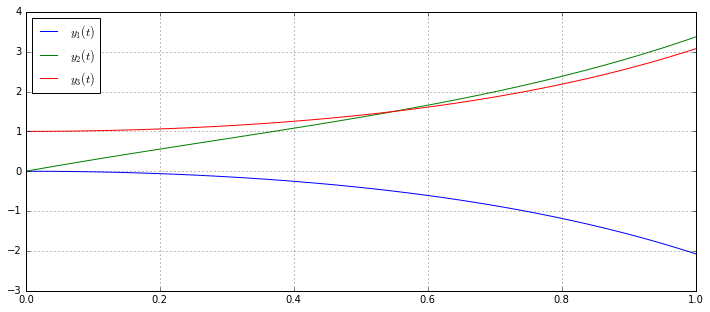

In [10]:
t = np.linspace(0,1,100)
y1 = C[0,0]*V[0,0]*np.exp(eigvals[0]*t) + C[1,0]*V[0,1]*np.exp(eigvals[1]*t) + C[2,0]*V[0,2]*np.exp(eigvals[2]*t)
y2 = C[0,0]*V[1,0]*np.exp(eigvals[0]*t) + C[1,0]*V[1,1]*np.exp(eigvals[1]*t) + C[2,0]*V[1,2]*np.exp(eigvals[2]*t)
y3 = C[0,0]*V[2,0]*np.exp(eigvals[0]*t) + C[1,0]*V[2,1]*np.exp(eigvals[1]*t) + C[2,0]*V[2,2]*np.exp(eigvals[2]*t)
plt.figure(figsize=(12,5))
plt.plot(t,y1,label='$y_1(t)$')
plt.plot(t,y2,label='$y_2(t)$')
plt.plot(t,y3,label='$y_3(t)$')
plt.legend(loc=0)
plt.grid('on')
plt.show()

### Markov Chains

A Markov chain is a set of states with probabilities at each state which describe the likelyhood to proceed to the next given state. For example, consider the example taken from [Wikipedia](https://en.wikipedia.org/wiki/Examples_of_Markov_chains#A_very_simple_weather_model) which describes a simple weather model. There are 2 states, rainy and sunny, and the probabilities of moving between each state is described in the diagram

![Markov](https://upload.wikimedia.org/wikipedia/commons/7/7a/Markov_Chain_weather_model_matrix_as_a_graph.png)

We can arrange all the probablilites into a transition matrix $P = [p_{i,j}]$ where $p_{i,j}$ is the probability of proceeding to state $i$ from state $j$. For example, if we label sunny as state 1 and rainy as state 2:

* $p_{1,1} = 0.9$ is the probability that the next day is sunny (1) given that today is sunny (1)
* $p_{1,2} = 0.5$ is the probability that the next day is sunny (1) given that today is rainy (2)
* $p_{2,1} = 0.1$ is the probability that the next day is rainy (2) given that today is sunny (1)
* $p_{2,2} = 0.5$ is the probability that the next day is rainy (2) given that today is rainy (2)

so that

$$
P = \begin{bmatrix} 0.9 & 0.5 \\ 0.1 & 0.5 \end{bmatrix}
$$

In [11]:
P = np.array([ [0.9,0.5], [0.1,0.5] ])
print(P)

[[ 0.9  0.5]
 [ 0.1  0.5]]


Let $\mathbf{x}_n$ be the probability vector

$$
\mathbf{x}_n = \begin{bmatrix} x_{n,1} \\ x_{n,2} \end{bmatrix}
$$

such that the probability of being at state 1 after $n$ steps is $x_{n,1}$ and the probability of being at state 2 after $n$ steps is for $x_{n,2}$.

This allows us to compute the probability vector at step $n+1$ as matrix multiplication

$$
\mathbf{x_{n+1}} = P \mathbf{x_n} = \begin{bmatrix} x_{n,1} p_{1,1} + x_{x,2} p_{1,2} \\ x_{n,1} p_{2,1} + x_{n,2} p_{2,2} \end{bmatrix}
$$

Let's say today is rainy, that is, $\mathbf{x}_0 = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$. **What is the probability that it's a rainy day one week later?** This just means we need to calculate $\mathbf{x}_7$.

In [12]:
x0 = np.array([ [0], [1] ])
print(x0)

[[0]
 [1]]


There's only one problem. Awkwardly, the package `scipy.linalg` doesn't have a function to compute matrix powers! So we need to do something like this:

In [13]:
la.fractional_matrix_power(P,7)

array([[ 0.8336064,  0.831968 ],
       [ 0.1663936,  0.168032 ]])

In [14]:
np.linalg.matrix_power(P,7)

array([[ 0.8336064,  0.831968 ],
       [ 0.1663936,  0.168032 ]])

Anyway, the probability of that it's a rainy day one week later is 16.8%.

In [15]:
P7 = np.linalg.matrix_power(P,7)
np.dot(P7,x0)

array([[ 0.831968],
       [ 0.168032]])

## 2. Exercises

**Exercise.** Find the unique solution of the linear system of equations

\begin{align}
y_1' &= 2y_1 + 3y_2 - 4y_3 \\
y_2' &= 4y_1 + y_2 - 4y_3 \\
y_3' &= -3y_1 + 3y_2 + y_3
\end{align}

with $y_1(0) = 0$, $y_2(0) = 1$ and $y_3(0) = -2$.

**Exercise.** Let $P$ be the transition matrix of a Markov chain. A **steady state vector** is a vector $\mathbf{s}$ which satisties

$$
\mathbf{s} = P \mathbf{s}
$$

In other words, the steady state vector is an eigenvector of $P$ with eigenvalue 1 **such that the entries of that eigenvector sum to 1**.

Consider a hockey shootout where Teams A and B takes turns until a single goal determines the winner of the game. For any turn, Team A has a 1/3 chance of scoring and Team B has a 2/5 chance of scoring. Find the transition matrix $P$ and the steady states using 4 states:

1. The game is not won and Team A is shooting
2. The game is not won and Team B is shooting
3. Team A has won the shootout
4. Team B has won the shootout

**Exercise.** Biologists at UBC observe the movement of a flock of birds on campus. They determine that the flock has three nesting areas labelled 1, 2 and 3. The daily position of the flock is as follows:

* If the flock is at 1, then there is a 20% chance the flocks moves to 2 the next day. Otherwise the flock remains at 1.
* If the flock is at 2, then there is a 40% chance the flocks moves to 3 the next day. Otherwise the flock remains at 2.
* If the flock is at 3, then there is a 50% chance the flocks moves to 1 the next day. Otherwise the flock remains at 3.

Find the transition matrix $P$ and the steady state.